In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Jose Nicolas Rodriguez Montoya
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






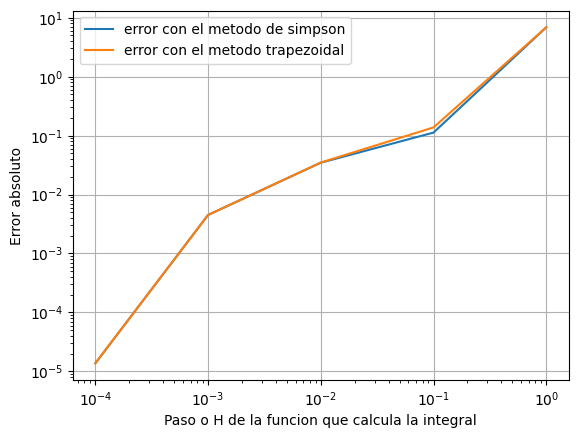

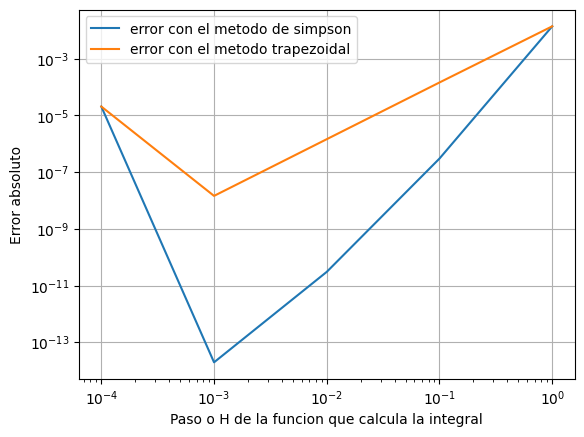

In [ ]:
f1 = lambda x: np.exp(3*x)*np.sin(x)
f2 = lambda x: 1/(x*np.log(x))   #definimos ambdas funciones

a1, b1 = 0, np.pi/4
a2, b2 = np.exp(1), 1 + np.exp(1) #definimos los limites de integracion para ambas funciones

f1exc, _ = quad(f1, a1, b1)
f2exc, _ = quad(f2, a2, b2)

h = lambda n: 10**(-n) #definimos una funcion que nos da el paso

error_simp_f1 = []
error_trapezoid_f1 = []
hs = []
for i in range(5): #hagamoslo para la funcion 1
  # recorramos la integral en ambas funciones para un espaciado de 0.1 hasta 0.001

  x = np.arange(a1, b1 + h(i), h(i)) #recorremos entre los limites de integracion
  y = f1(x)
  error_simp_f1.append(abs(f1exc - simpson(y, x)))
  error_trapezoid_f1.append(abs(f1exc - trapezoid(y, x)))
  hs.append(h(i))

plt.loglog(hs, error_simp_f1, label = 'error con el metodo de simpson')   #hacemos el grafico para ambas
plt.loglog(hs, error_trapezoid_f1, label = 'error con el metodo trapezoidal')
plt.xlabel('Paso o H de la funcion que calcula la integral')
plt.ylabel('Error absoluto')
plt.legend()
plt.grid()
plt.show()

#repetimos el proceso para f2
error_simp_f2 = []
error_trapezoid_f2 = []
hs2 = []
for i in range(5):
  # recorramos la integral en ambas funciones para un espaciado de 0.1 hasta 0.0001

  x = np.arange(a2, b2 + h(i), h(i)) #Recorremos entre los limites de integracion
  y = f2(x)
  error_simp_f2.append(abs(f2exc - simpson(y, x)))
  error_trapezoid_f2.append(abs(f2exc - trapezoid(y, x)))
  hs2.append(h(i))

plt.loglog(hs2, error_simp_f2, label = 'error con el metodo de simpson')   #hacemos el grafico para ambas
plt.loglog(hs2, error_trapezoid_f2, label = 'error con el metodo trapezoidal')
plt.xlabel('Paso o H de la funcion que calcula la integral')
plt.ylabel('Error absoluto')
plt.legend()
plt.grid()
plt.show()



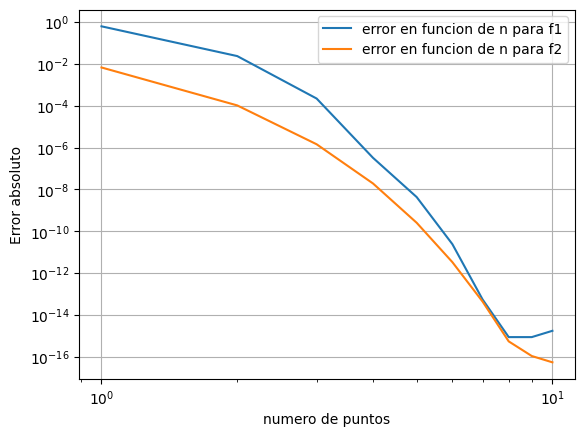

In [ ]:
# Para fixed quad
# Como fixed llama una funcion callable, entonces aqui variaremos los n desde 1 a 10
n_p = [i for i in range (1,11)]

fxquad_error_f1 = []
fxquad_error_f2 = []

for i in n_p:
  y1 = fixed_quad(f1, a1, b1, n = i)  # encontramos el valor evaluado para esa cantidad de puntos

  y2 = fixed_quad(f2, a2, b2, n = i)

  fxquad_error_f1.append(abs(quad(f1, a1, b1)[0] - y1[0])) #comparamos con los puntos dados por quad
  fxquad_error_f2.append(abs(quad(f2, a2, b2)[0] - y2[0]))

#GRAFICAMOS
plt.loglog(n_p, fxquad_error_f1, label = 'error en funcion de n para f1')   #hacemos el grafico para ambas
plt.loglog(n_p, fxquad_error_f2, label = 'error en funcion de n para f2')
plt.xlabel('numero de puntos')
plt.ylabel('Error absoluto')
plt.legend()
plt.grid()
plt.show()



#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [ ]:
from scipy.integrate import tplquad #importamos tplquad

def integral_z (y, x):
  integrando = lambda z : (1/y) * np.sin(z/y) #esta seria la funcion que representa la integral mas interna
  resultado, _ = quad(integrando, 0, x*y)
  return resultado #resolvemos usando quad

def integral_y (x):
  integrando = lambda y: integral_z(y, x)
  resultado, _ = quad(integrando, 0, x)
  return resultado

integral, _ = quad(integral_y, 0, np.pi)

#comparemos con tplquad
#definimos una funcion
f_tpl = lambda z, y, x: (1/y)* np.sin(z/y)

#definimos los limtes de las funciones a integrar
a, b = 0, np.pi # las constantes
g, h = lambda x: 0, lambda x: x #las integrales cuando ya solo queda una "Variable"
q, r = lambda x, y: 0, lambda x, y : x*y #la primera integral que resolveriamos a mano

integraltpl, _ = tplquad(f_tpl, a, b, g, h, q, r)


print(f' el resultado manual es {integral}, el resultado con tplquad es {integraltpl} y el error es {abs(integral-integraltpl)}')

 el resultado manual es 6.934802200544679, el resultado con tplquad es 6.934802200544679 y el error es 0.0


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [ ]:
import numpy as np
from scipy.special import roots_legendre

def gauss_quad_standard(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - a: Límite inferior de integración.
    - b: Límite superior de integración.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre en [-1, 1]
    x, w = roots_legendre(n)

    # Transformación lineal para mapear de [-1, 1] a [a, b]
    # x_scaled = (b-a)/2 * x + (a+b)/2
    x_scaled = 0.5*(b-a)*x + 0.5*(a+b)

    # Evaluar la suma ponderada con el factor de escala (b-a)/2
    integral = 0.5*(b-a) * np.sum(w * func(x_scaled))

    return integral

g = lambda x: x
gauss_quad_standard(g, 0, 2, 5)

np.float64(2.0)

In [ ]:
n = 300
def integrando(z, y, x):
  return (1/y) * np.sin(z/y)

def integral_z(y, x, n = 5):
  return gauss_quad_standard(lambda z: integrando(z,y,x), 0, x*y, n)

def integrando_y(x, n = 10):
  return gauss_quad_standard(lambda y: integral_z(y,x,n), 0, x, n)

def integral_x(n):
  return gauss_quad_standard(lambda x: integrando_y(x, n), 0, np.pi, n)

print(integral_x(n))

# REVISAR


9.107331966336645


$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
def regla_trapecio_adaptativa(f, a, b, tol=1e-5, max_iter=1000):
    """
    Aproxima la integral definida usando la regla del trapecio de forma adaptativa,
    iterando hasta que el error entre dos aproximaciones consecutivas sea menor que 'tol'.

    Parámetros:
    - f: Función a integrar (callable).
    - a: Límite inferior (float).
    - b: Límite superior (float).
    - tol: Tolerancia de error (float). Por defecto 1e-6.
    - max_iter: Máximo número de iteraciones (int). Por defecto 1000.

    Retorna:
    - aproximacion: Valor aproximado de la integral (float).
    - n: Número de subintervalos usados (int).
    """
    n = 1  # Empezamos con un solo trapecio
    aproximacion_prev = 0.5 * (b - a) * (f(a) + f(b))  # Aproximación inicial (n=1)

    for _ in range(max_iter):
        n *= 2  # Duplicamos el número de subintervalos
        h = (b - a) / n
        suma = 0.0

        # Sumamos los puntos medios (ahora hay más subintervalos)
        for i in range(1, n, 2):  # Solo iteramos sobre los nuevos puntos
            suma += f(a + i * h)

        aproximacion_actual = 0.5 * aproximacion_prev + h * suma

        # Verificamos la diferencia entre iteraciones
        if abs(aproximacion_actual - aproximacion_prev) < tol:
            return aproximacion_actual, n

        aproximacion_prev = aproximacion_actual

    raise ValueError(f"No se alcanzó la tolerancia en {max_iter} iteraciones.")

In [ ]:
def simpson_integral(f, a, b, tol=1e-5, max_iter=1000):
    """
    Calcula la integral definida de una función usando el método de Simpson compuesto
    con un error absoluto estimado menor a la tolerancia especificada.

    Parámetros:
    f (función): Función a integrar (debe ser vectorizable)
    a (float): Límite inferior de integración
    b (float): Límite superior de integración
    tol (float): Tolerancia deseada para el error (default: 1e-5)
    max_iter (int): Número máximo de iteraciones (default: 1000)

    Retorna:
    tuple: (valor de la integral, error estimado, número de evaluaciones)
    """
    # Primera iteración con n=2 (un solo intervalo)
    n = 2
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)

    integral_prev = h / 3 * (y[0] + 4 * y[1] + y[2])

    for i in range(1, max_iter):
        n *= 2  # Duplicamos el número de intervalos en cada iteración
        h = (b - a) / n
        x_new = np.linspace(a, b, n + 1)

        # Solo calculamos los nuevos puntos (los anteriores ya los tenemos)
        y_new = f(x_new)

        # Aplicamos la regla de Simpson compuesta
        integral = h / 3 * (y_new[0] + y_new[-1] + 4 * np.sum(y_new[1:-1:2]) + 2 * np.sum(y_new[2:-1:2]))

        # Estimación del error (usando la diferencia entre iteraciones)
        error_est = abs(integral - integral_prev) / 15  # Factor de convergencia para Simpson

        if error_est < tol:
            return integral, error_est, n + 1

        integral_prev = integral

    print(f"Advertencia: No se alcanzó la tolerancia deseada después de {max_iter} iteraciones")
    return integral, error_est, n + 1


In [ ]:
# Para la primera integral.
a, b = 1e-5, np.pi/2  # definimos un valor cercano a cero para que lo evite
f = lambda x: 1/np.sqrt(np.tan(x))

print(regla_trapecio_adaptativa(f, a, b)[0])

print(quad(f, a, b)[0])

print(simpson_integral(f, a, b)[0])

2.2151198660730747
2.215116913771584
2.21514236418761


0.018110392516418543
0.018109508841002646
0.0181155325230905


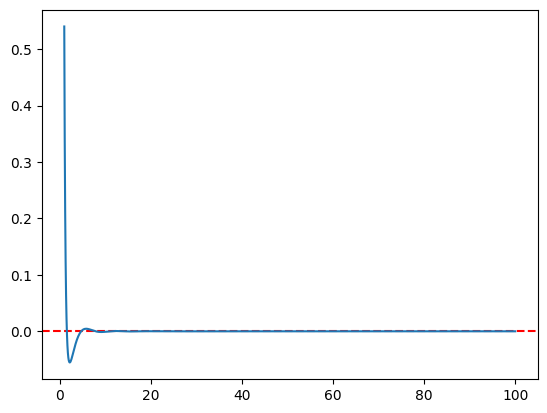

In [ ]:
f = lambda x: np.cos(x)/x**3

x = np.linspace(1, 100, 1000)
y = f(x)
plt.axhline(0, linestyle = '--', color = 'red')
plt.plot(x, y)
# Como parece que la funcion no toma valores que puedan ser significativos, por lo que tomaremos como limite al infinito en a= 35

print(regla_trapecio_adaptativa(f, 1, 35)[0])

print(quad(f, 1, 35)[0])

print(simpson_integral(f, 1, 35)[0])

In [ ]:
integrando = lambda y : 1/np.sqrt(1-(y)**2)
a, b = 0, lambda x: np.sin(x)
c, d =  0, np.pi/4

def integral_y (x):
  return regla_trapecio_adaptativa(integrando, a, b(x))[0]

integral_x = regla_trapecio_adaptativa(integral_y, c, d)[0]
#regla_trapecio_adaptativa(integrando, 0, np.sin(x))

print(integral_x)

#PARA METODO DEL TRAPECIO


0.3084259549943772


In [ ]:
# Usando la funcion usando la funcion ofrecida por scipy
def integrando(y):
    return 1 / np.sqrt(1 - y**2)

# Límites en x
x_points = np.linspace(0, np.pi/4, 1000)

# Calculamos la integral interior para cada x
integrales_interiores = []
for x in x_points:
    y_upper = np.sin(x)
    if y_upper <= 0:
        integrales_interiores.append(0)
        continue
    y_points = np.linspace(0, y_upper, 1000)
    valores = integrando(y_points)
    integral = simpson(valores, y_points)
    integrales_interiores.append(integral)

# Calculamos la integral exterior
resultado = simpson(integrales_interiores, x_points)

# Estimación del error (aproximada)
error_estimado = 1e-6  # Ajustar según sea necesario

resultado, error_estimado

(np.float64(0.3084251375341329), 1e-06)

In [ ]:
#Intefgral usando quad.
def integral_y(x):
  integrando = lambda y: 1/ np.sqrt(1-(y)**2)
  resultado, _ = quad(integrando, 0, np.sin(x))
  return resultado

integral, _ = quad(integral_y, 0, np.pi/4)
print(integral)



0.30842513753404244
